<a href="https://colab.research.google.com/github/KomuravelliTharuni/Smart-Waste-Management-System/blob/main/Smart_waste_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python tensorflow fastapi uvicorn streamlit kaggle matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [14]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2) (1).json


{'kaggle (2) (1).json': b'{"username":"komuravellitharuni","key":"968aea8e85ff6a5172d526adc77e999c"}'}

In [15]:
!mkdir -p ~/.kaggle
!cp 'kaggle (3).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d asdasdasasdas/garbage-classification
!unzip garbage-classification.zip -d garbage_data

Streaming output truncated to the last 5000 lines.
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: garbage_data/Garbage classif

CLasses available: ['cardboard', 'metal', 'paper', 'glass', 'trash', 'plastic']
Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


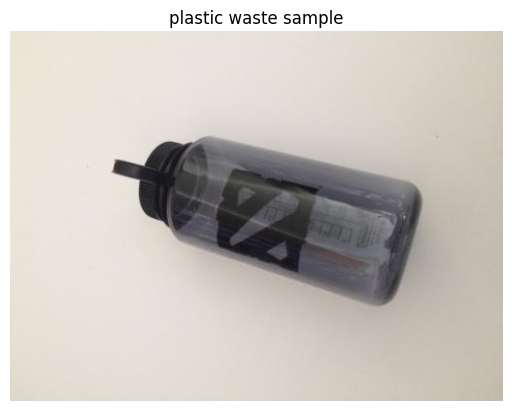

In [17]:
import os
base_dir="garbage_data/Garbage classification/Garbage classification"
print("CLasses available:",os.listdir(base_dir))


import tensorflow as tf
batch_size=32
img_size=(224,224)
train_ds=tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
class_names = train_ds.class_names
print("Class names:",class_names)
import matplotlib.pyplot as plt
import cv2
import os

image_path=f'{base_dir}/plastic/plastic1.jpg'
img=cv2.imread(image_path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("plastic waste sample")
plt.axis("off")
plt.show()

In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
classes = os.listdir(base_dir)
num_classes = len(classes)
print(f"We have{num_classes} classes")
total_images = 0
for c in classes:
    images = os.listdir(os.path.join(base_dir, c))
    total_images += len(images)
print(f"for category {c}, we have {len(images)} images")
print(f"Total images: {total_images}")

We have6 classes
for category plastic, we have 482 images
Total images: 2527


In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=img_size + (3,) , include_top=False, weights='imagenet')
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.3953 - loss: 1.6709 - val_accuracy: 0.5980 - val_loss: 1.0530
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5670 - loss: 1.1411 - val_accuracy: 0.6554 - val_loss: 0.9556
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6568 - loss: 0.9415 - val_accuracy: 0.6713 - val_loss: 0.8791
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6527 - loss: 0.9190 - val_accuracy: 0.6653 - val_loss: 0.8852
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.6775 - loss: 0.8519 - val_accuracy: 0.6713 - val_loss: 0.8615
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7070 - loss: 0.8063 - val_accuracy: 0.6812 - val_loss: 0.8289
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.7120 - loss: 0.7786 - val_accuracy: 0.7050 - val_loss: 0.8041
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7364 - loss: 0.7322 - val_accuracy: 0.6832 - v

In [25]:
model.save('waste_classifier_model.h5')